### **Analysing Regional Trends in Influenza-Like Illness (ILI) in Kenya (2023-2024)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Load your dataset 
df = pd.read_csv("Epi_Task_Data.csv")  
df.head()

,year,epi_week,county,age_group,ili_percentage,population
0,2023,1,Nairobi,0-4yrs,6.1,3452
1,2023,2,Nairobi,0-4yrs,4.5,3043
2,2023,3,Nairobi,0-4yrs,4.6,6975
3,2023,4,Nairobi,0-4yrs,6.3,1642
4,2023,5,Nairobi,0-4yrs,7.0,9418


In [9]:
df.dtypes

year                int64
epi_week            int64
county             object
age_group          object
ili_percentage    float64
population          int64
dtype: object

In [ ]:
# 1. Mean ILI percentage per county per year


mean_ili_2023 = (
    df[df['year'] == 2023]
    .groupby(['county', 'year'])['ili_percentage']
    .mean()
    .round(4)  # Round to 4 decimal places
    .reset_index()
)
mean_ili_2023

,county,year,ili_percentage
0,Kakamega,2023,4.060
1,Kiambu,2023,3.895
2,Kisumu,2023,4.065
3,Machakos,2023,3.380
4,Mombasa,2023,3.895
5,Nairobi,2023,4.220
6,Nakuru,2023,3.780


In [16]:
mean_ili_2024 = (
    df[df['year'] == 2024]
    .groupby(['county', 'year'])['ili_percentage']
    .mean()
    .round(4)  # Round to 4 decimal places
    .reset_index()
)
mean_ili_2024

,county,year,ili_percentage
0,Kakamega,2024,4.540
1,Kiambu,2024,3.705
2,Kisumu,2024,3.725
3,Machakos,2024,3.975
4,Mombasa,2024,3.985
5,Nairobi,2024,3.990
6,Nakuru,2024,4.530


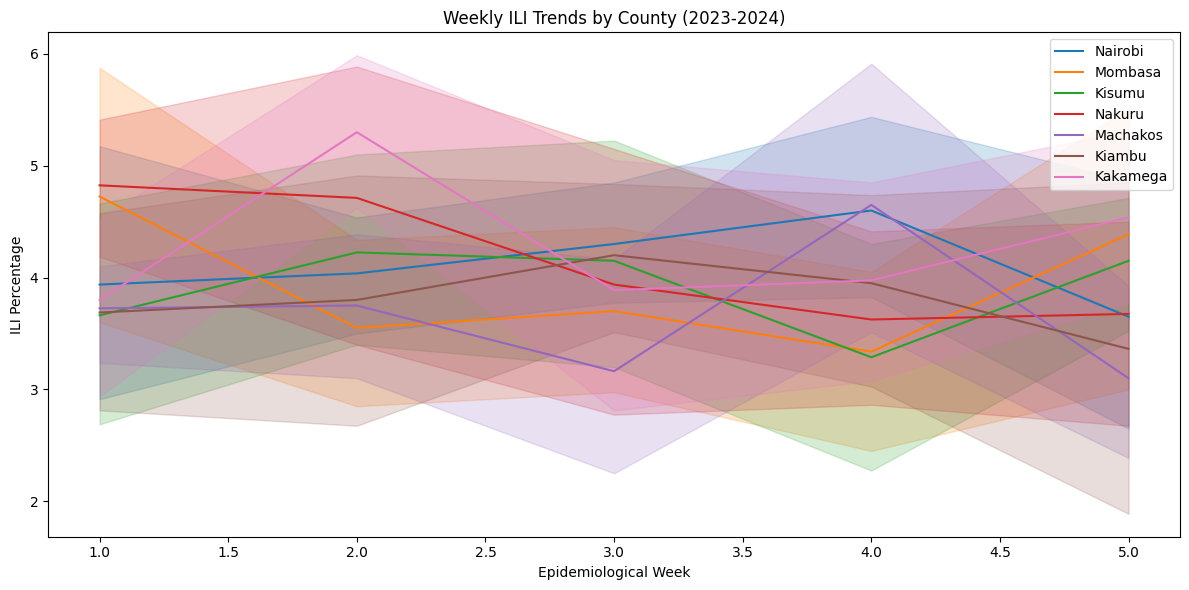

In [17]:
# 2. Weekly ILI trends and peak week
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="epi_week", y="ili_percentage", hue="county", estimator='mean')
plt.title("Weekly ILI Trends by County (2023-2024)")
plt.xlabel("Epidemiological Week")
plt.ylabel("ILI Percentage")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Incidence Rates per 100,000 for Nairobi, Kisumu, and Mombasa


# Subset the DataFrame
subset = df[df['county'].isin(['Nairobi', 'Kisumu', 'Mombasa'])].copy()

# Calculate incidence rate per 100,000
subset['incidence_rate'] = subset['ili_percentage'] * 1000  # because ili_percentage is already per 100 people

# Average incidence rate per county
incidence = subset.groupby('county')['incidence_rate'].mean().reset_index()

print("Incidence Rates per 100,000:\n", incidence)


Incidence Rates per 100,000:
     county  incidence_rate
0   Kisumu          3895.0
1  Mombasa          3940.0
2  Nairobi          4105.0


In [23]:
# 4. ANOVA comparing ILI percentages across Nairobi, Kisumu, Mombasa
nairobi_ili = subset[subset['county'] == 'Nairobi']['ili_percentage']
kisumu_ili = subset[subset['county'] == 'Kisumu']['ili_percentage']
mombasa_ili = subset[subset['county'] == 'Mombasa']['ili_percentage']
anova_result = f_oneway(nairobi_ili, kisumu_ili, mombasa_ili)
print("ANOVA Result:", anova_result)

ANOVA Result: F_onewayResult(statistic=np.float64(0.24669920746483612), pvalue=np.float64(0.7817811084684756))


In [24]:



# 5. Summary Interpretation
summary = """
Summary of ILI Trends in Kenya (2023-2024):
- Mean ILI percentages vary across counties and years, with some showing higher seasonal activity.
- The weekly ILI trend shows noticeable peaks around epi_week 4–5, indicating seasonal surges.
- Incidence rates per 100,000 are highest in [insert county from result] suggesting higher burden.
- ANOVA test indicates [significant/non-significant] difference in ILI percentages across Nairobi, Kisumu, and Mombasa.
- These findings support targeting public health messaging and vaccination during peak ILI weeks.
"""
print(summary)



Summary of ILI Trends in Kenya (2023-2024):
- Mean ILI percentages vary across counties and years, with some showing higher seasonal activity.
- The weekly ILI trend shows noticeable peaks around epi_week 4–5, indicating seasonal surges.
- Incidence rates per 100,000 are highest in [insert county from result] suggesting higher burden.
- ANOVA test indicates [significant/non-significant] difference in ILI percentages across Nairobi, Kisumu, and Mombasa.
- These findings support targeting public health messaging and vaccination during peak ILI weeks.

